# BUILDING ENERGY EFFICIENCY - 2

This Note Book includes developing a comprehensive analysis of data obtained from a building's sensors and also developing a regression model using the data.The dataset for the remainder of this quiz is the Appliances Energy Prediction data. The data set is at 10 min for about 4.5 months. The house temperature and humidity conditions were monitored with a ZigBee wireless sensor network. Each wireless node transmitted the temperature and humidity conditions around 3.3 min. Then, the wireless data was averaged for 10 minutes periods. The energy data was logged every 10 minutes with m-bus energy meters. Weather from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis (rp5.ru), and merged together with the experimental data sets using the date and time column. Two random variables have been included in the data set for testing the regression models and to filter out non predictive attributes (parameters). The attribute information can be seen below.

Attribute Information:

Date, time year-month-day hour:minute:second

Appliances, energy use in Wh

lights, energy use of light fixtures in the house in Wh

T1, Temperature in kitchen area, in Celsius

RH_1, Humidity in kitchen area, in %

T2, Temperature in living room area, in Celsius

RH_2, Humidity in living room area, in %

T3, Temperature in laundry room area

RH_3, Humidity in laundry room area, in %

T4, Temperature in office room, in Celsius

RH_4, Humidity in office room, in %

T5, Temperature in bathroom, in Celsius

RH_5, Humidity in bathroom, in %

T6, Temperature outside the building (north side), in Celsius

RH_6, Humidity outside the building (north side), in %

T7, Temperature in ironing room , in Celsius

RH_7, Humidity in ironing room, in %

T8, Temperature in teenager room 2, in Celsius

RH_8, Humidity in teenager room 2, in %

T9, Temperature in parents room, in Celsius

RH_9, Humidity in parents room, in %

To, Temperature outside (from Chievres weather station), in Celsius

Pressure (from Chievres weather station), in mm Hg

RH_out, Humidity outside (from Chievres weather station), in %

Wind speed (from Chievres weather station), in m/s

Visibility (from Chievres weather station), in km

Tdewpoint (from Chievres weather station), Â °C

rv1, Random variable 1, nondimensional

rv2, Random variable 2, nondimensional

To answer some questions, you will need to normalize the dataset using the MinMaxScaler after removing the following columns: [“date”, “lights”]. The target variable is “Appliances”. Use a 70-30 train-test set split with a  random state of 42 (for reproducibility). Run a multiple linear regression using the training set and evaluate your model on the test set.

## Importing Required Libraries

In [1]:
import numpy as np 
import pandas as pd # data processing,
# for plotting
import matplotlib.pyplot as plt 
import seaborn as sns
import matplotlib.gridspec as gridspec
import statsmodels.api as sm
# to give the graphs a little bit of aesthetics and size the graphs
sns.despine() 

plt.rc('figure', figsize=(20,10)) 

# extending the number of viewable columns
pd.options.display.max_columns = 30

C:\Users\abiso\Anaconda\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
C:\Users\abiso\Anaconda\lib\site-packages\statsmodels\compat\pandas.py:23: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


<Figure size 432x288 with 0 Axes>

## Importing the Data 

In [2]:
data=pd.read_csv('energydata_complete.csv')
data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [3]:
dat =  data.copy()

In [4]:
dat = dat.drop(['date','lights'], axis=1)

In [5]:
dat.head()

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,60,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,60,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,50,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,50,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,60,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


# A Quick Exploratory Data Analysis  

## Checking for the dimensionof the data

In [6]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 27 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Appliances   19735 non-null  int64  
 1   T1           19735 non-null  float64
 2   RH_1         19735 non-null  float64
 3   T2           19735 non-null  float64
 4   RH_2         19735 non-null  float64
 5   T3           19735 non-null  float64
 6   RH_3         19735 non-null  float64
 7   T4           19735 non-null  float64
 8   RH_4         19735 non-null  float64
 9   T5           19735 non-null  float64
 10  RH_5         19735 non-null  float64
 11  T6           19735 non-null  float64
 12  RH_6         19735 non-null  float64
 13  T7           19735 non-null  float64
 14  RH_7         19735 non-null  float64
 15  T8           19735 non-null  float64
 16  RH_8         19735 non-null  float64
 17  T9           19735 non-null  float64
 18  RH_9         19735 non-null  float64
 19  T_ou

In [7]:
print('The number of rows are {} and number of columns are {} '. format(dat.shape[0], dat.shape[1]))

The number of rows are 19735 and number of columns are 27 


## Checking for Missing Data

In [8]:
dat.isnull().sum()

Appliances     0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

- The  data has no missing values which means we are good a bit

In [9]:
dat.describe()

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,19.592106,50.949283,7.910939,54.609083,20.267106,35.388200,22.029107,42.936165,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,1.844623,9.022034,6.090347,31.149806,2.109993,5.114208,1.956162,5.224361,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,15.330000,29.815000,-6.065000,1.000000,15.390000,23.200000,16.306667,29.600000,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,18.277500,45.400000,3.626667,30.025000,18.700000,31.500000,20.790000,39.066667,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,19.390000,49.090000,7.300000,55.290000,20.033333,34.863333,22.100000,42.375000,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,20.619643,53.663333,11.256000,83.226667,21.600000,39.000000,23.390000,46.536000,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,25.795000,96.321667,28.290000,99.900000,26.000000,51.400000,27.230000,58.780000,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


## Observation 

Its can be observed that all the variables show a fairly go distribution of the data with little to outlier effect as the data are relative distributed around the mean as their maximum data are relative not too far from their mean. 
However, the target variable "Appliances" is greatly affected by outlier as the maximum data 1080 is relatively far from the mean of 97.695

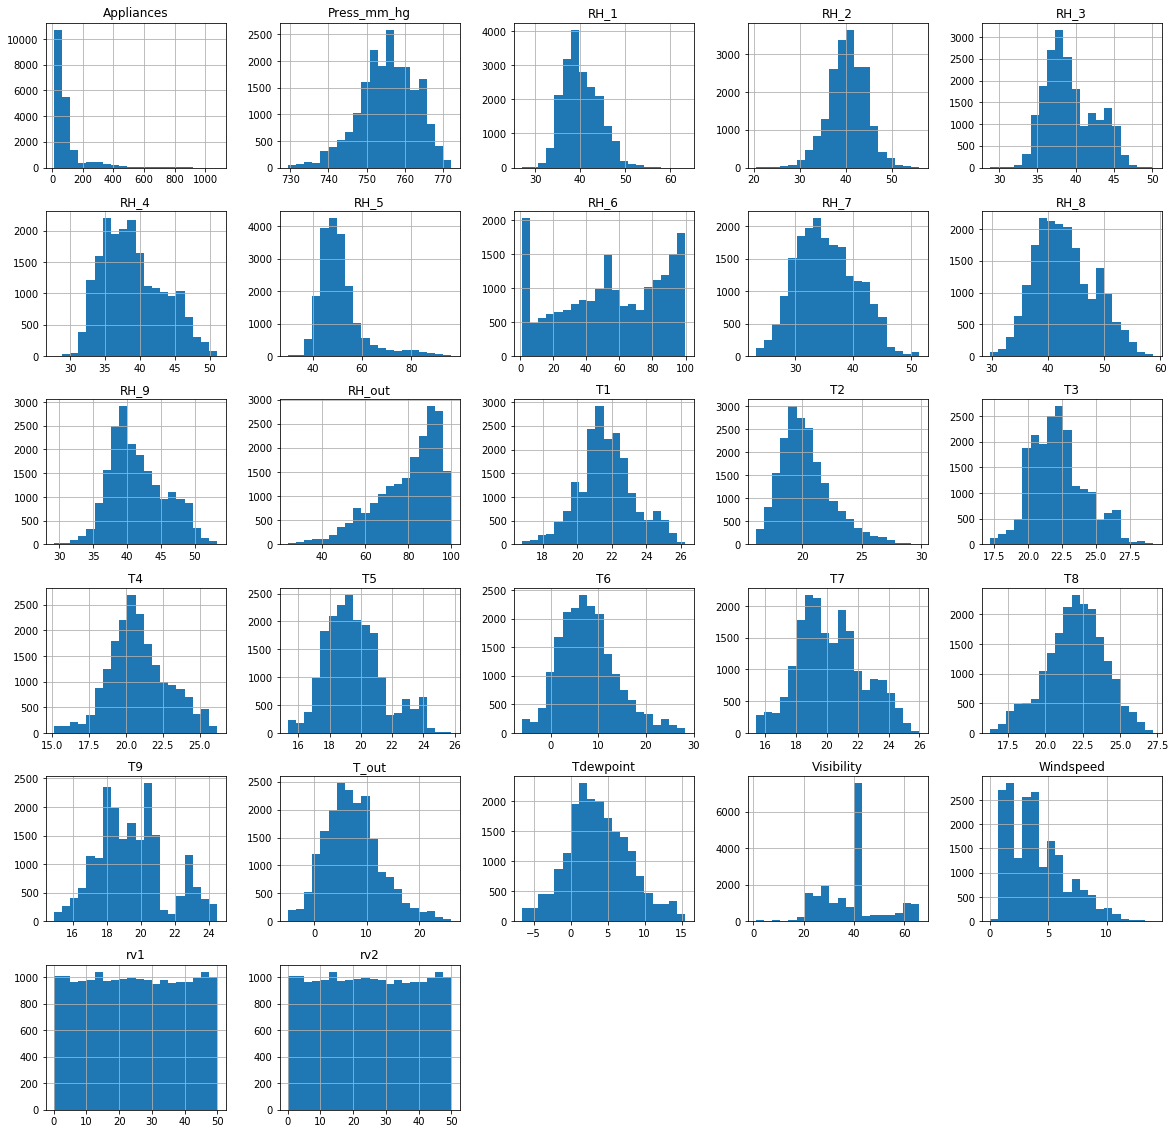

In [10]:
dat.hist(bins=20, figsize=(20,20));

In [11]:
## Checking the magnitude and parameters of the various features

def magnitude_check(features):
    
    """
    Checks the magnitude of the feature to identify the difference in scale.
    
    """
    modf = []
    modf = pd.DataFrame(modf , columns=['Max', 'Min', 'Range', 'Max_Mean_Range','Min_Mean_Range'])
    for idx in features.columns:
        #modf.loc[idx,'Feature'] = idx
        modf.loc[idx,'Max'] = features[idx].max()
        modf.loc[idx,'Min'] = features[idx].min()
        modf.loc[idx,'Range']= features[idx].max() - features[idx].min()
        modf.loc[idx,'Max_Mean_Range']= features[idx].max() - features[idx].mean()
        modf.loc[idx,'Min_Mean_Range']= features[idx].mean() - features[idx].min()
    return modf

In [12]:
magnitude_check(dat)

,Max,Min,Range,Max_Mean_Range,Min_Mean_Range
Appliances,1080,10,1070,982.305,87.695
T1,26.26,16.79,9.47,4.57343,4.89657
RH_1,63.36,27.0233,36.3367,23.1003,13.2364
T2,29.8567,16.1,13.7567,9.51545,4.24122
RH_2,56.0267,20.4633,35.5633,15.6062,19.9571
T3,29.236,17.2,12.036,6.96839,5.06761
RH_3,50.1633,28.7667,21.3967,10.9208,10.4758
T4,26.2,15.1,11.1,5.34467,5.75533
RH_4,51.09,27.66,23.43,12.0631,11.3669
T5,25.795,15.33,10.465,6.20289,4.26211


##  Observation 

-  The target variable is relatively affected by the outliers  as seen in the range and distance of the Max_Mean and Mean_Min
-  The RH_5 variable is relatively affected by outliers as most of the variables are positvely skewed with outliers of 90 on the max end 

Distribution 

- It can be observed that all variables are normally distributed with exceptions of Appliance,  Windspeed and RH_5 (Positively Skewed), RH_out (Negatively) , visibility (Irregularly skewed)


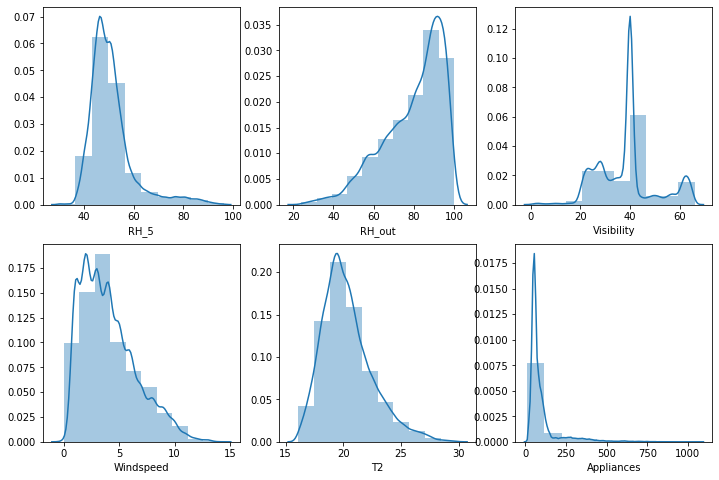

In [13]:
# focussed displots for RH_6 , T2, RH_out , Visibility , Windspeed due to irregular distribution

fig, ax = plt.subplots(nrows=2,ncols=3,figsize=(12,8))
ax1 = sns.distplot(dat["RH_5"],  bins=10, ax= ax[0][0])
ax2 = sns.distplot(dat["RH_out"],bins=10, ax=ax[0][1])
ax3 = sns.distplot(dat["Visibility"],bins=10, ax=ax[0][2])
ax4 = sns.distplot(dat["Windspeed"],bins=10, ax=ax[1][0])
ax5 = sns.distplot(dat["T2"], bins=10, ax=ax[1][1])
ax6 = sns.distplot(dat["Appliances"],bins=10, ax=ax[1][2])


## Observation 

-  The Target variable is postively skewed this informs the decision that a log transformation might be need to transform the target variable for better representation of the model and to increase the predictive power of the ,model

In [14]:
dat.columns

Index(['Appliances', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4',
       'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9',
       'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

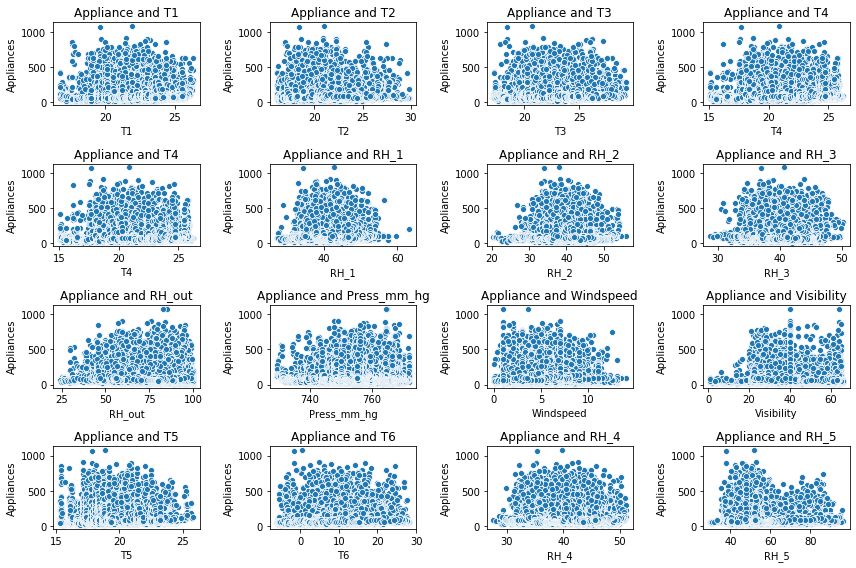

In [15]:
fig, ax = plt.subplots(nrows=4,ncols=4,figsize=(12,8))
ax1 = sns.scatterplot(x='T1', y='Appliances', data=dat, ax = ax[0][0])
ax1.set_title('Appliance and T1')
ax2 = sns.scatterplot(x='T2', y='Appliances', data=dat, ax = ax[0][1])
ax2.set_title('Appliance and T2')
ax3 = sns.scatterplot(x='T3', y='Appliances', data=dat, ax = ax[0][2])
ax3.set_title('Appliance and T3')
ax4 = sns.scatterplot(x='T4', y='Appliances', data=dat, ax = ax[0][3])
ax4.set_title('Appliance and T4')
ax5 = sns.scatterplot(x='T4', y='Appliances', data=dat, ax = ax[1][0])
ax5.set_title('Appliance and T4')
ax6 = sns.scatterplot(x='RH_1', y='Appliances', data=dat, ax = ax[1][1])
ax6.set_title('Appliance and RH_1')
ax7 = sns.scatterplot(x='RH_2', y='Appliances', data=dat, ax = ax[1][2])
ax7.set_title('Appliance and RH_2')
ax8 = sns.scatterplot(x='RH_3', y='Appliances', data=dat, ax = ax[1][3])
ax8.set_title('Appliance and RH_3')
ax9 = sns.scatterplot(x='RH_out', y='Appliances', data=dat, ax = ax[2][0])
ax9.set_title('Appliance and RH_out')
ax10 = sns.scatterplot(x='Press_mm_hg', y='Appliances', data=dat, ax = ax[2][1])
ax10.set_title('Appliance and Press_mm_hg')
ax11 = sns.scatterplot(x='Windspeed', y='Appliances', data=dat, ax = ax[2][2])
ax11.set_title('Appliance and Windspeed')
ax12 = sns.scatterplot(x='Visibility', y='Appliances', data=dat, ax = ax[2][3])
ax12.set_title('Appliance and Visibility')
ax13 = sns.scatterplot(x='T5', y='Appliances', data=dat, ax = ax[3][0])
ax13.set_title('Appliance and T5')
ax14 = sns.scatterplot(x='T6', y='Appliances', data=dat, ax = ax[3][1])
ax14.set_title('Appliance and T6')
ax15 = sns.scatterplot(x='RH_4', y='Appliances', data=dat, ax = ax[3][2])
ax15.set_title('Appliance and RH_4')
ax16 = sns.scatterplot(x='RH_5', y='Appliances', data=dat, ax = ax[3][3])
ax16.set_title('Appliance and RH_5')

fig.tight_layout()

## Observation
The Target variable "Appliances" showed an almost random distribution with no clear distribution with most of the data. To get a clear sense of a better relationship of the variables we will be running a correlation test.

In [16]:
#Splitting the data into target and explanatory variables 
dat1=dat.drop(["Appliances"],axis=1)
target1 = dat["Appliances"]



In [17]:
# Fitting the model
from sklearn.linear_model import LinearRegression
energy_model = LinearRegression()
energy_model.fit(dat1,target1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# LINEARITY TEST

In [18]:
def calculate_residuals(model, features, label):
    """
    Creates predictions on the features with the model and calculates residuals
    """
    predictions = model.predict(features)
    df_results = pd.DataFrame({'Actual': label, 'Predicted': predictions})
    df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])
    
    return df_results

In [19]:
def linear_assumption(model, features, label):
    """
    Linearity: Assumes that there is a linear relationship between the predictors and
               the response variable. If not, either a quadratic term or another
               algorithm should be used.
    """
    print('Assumption 1: Linear Relationship between the Target and the Feature', '\n')
        
    print('Checking with a scatter plot of actual vs. predicted.',
           'Predictions should follow the diagonal line.')
    
    # Calculating residuals for the plot
    df_results = calculate_residuals(model, features, label)
    
    # Plotting the actual vs predicted values
    sns.lmplot(x='Actual', y='Predicted', data=df_results, fit_reg=False, size=7)
        
    # Plotting the diagonal line
    line_coords = np.arange(df_results.min().min(), df_results.max().max())
    plt.plot(line_coords, line_coords,  # X and y points
             color='darkorange', linestyle='--')
    plt.title('Actual vs. Predicted')
    plt.show()

Assumption 1: Linear Relationship between the Target and the Feature 

Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


C:\Users\abiso\Anaconda\lib\site-packages\seaborn\regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


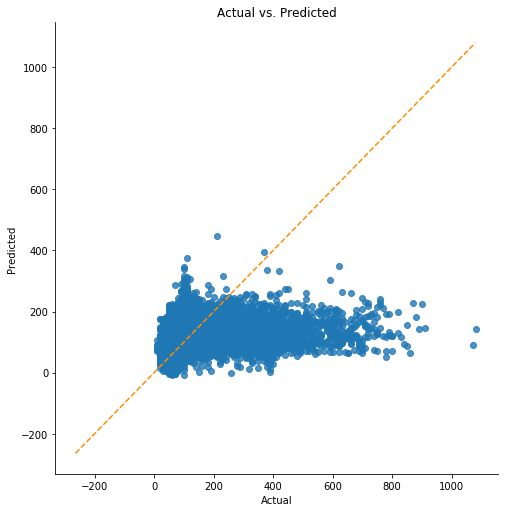

In [20]:
linear_assumption(energy_model, dat1, target1)

In [21]:
def normality_errors_assumption(model, features, label, p_value_thresh=0.05):
    """
    Normality: Assumes that the error terms are normally distributed. If they are not,
    nonlinear transformations of variables may solve this.
               
    This assumption being violated primarily causes issues with the confidence intervals
    """
    from statsmodels.stats.diagnostic import normal_ad
    print('Assumption 2: The error terms are normally distributed', '\n')
    
    # Calculating residuals for the Anderson-Darling test
    df_results = calculate_residuals(model, features, label)
    
    print('Using the Anderson-Darling test for normal distribution')

    # Performing the test on the residuals
    p_value = normal_ad(df_results['Residuals'])[1]
    print('p-value from the test - below 0.05 generally means non-normal:', p_value)
    
    # Reporting the normality of the residuals
    if p_value < p_value_thresh:
        print('Residuals are not normally distributed')
    else:
        print('Residuals are normally distributed')
    
    # Plotting the residuals distribution
    plt.subplots(figsize=(12, 6))
    plt.title('Distribution of Residuals')
    sns.distplot(df_results['Residuals'])
    plt.show()
    
    print()
    if p_value > p_value_thresh:
        print('Assumption satisfied')
    else:
        print('Assumption not satisfied')
        print()
        print('Confidence intervals will likely be affected')
        print('Try performing nonlinear transformations on variables')

Assumption 2: The error terms are normally distributed 

Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 0.0
Residuals are not normally distributed


C:\Users\abiso\Anaconda\lib\site-packages\statsmodels\stats\_adnorm.py:67: RuntimeWarning: divide by zero encountered in log
  S = np.sum((2*i[sl1]-1.0)/N*(np.log(z)+np.log(1-z[sl2])), axis=axis)


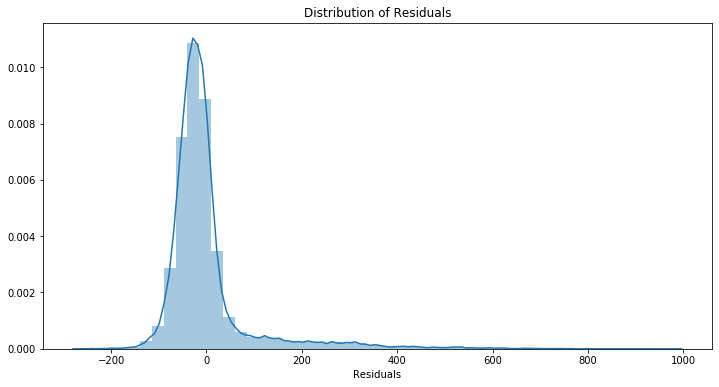


Assumption not satisfied

Confidence intervals will likely be affected
Try performing nonlinear transformations on variables


In [22]:
normality_errors_assumption(energy_model, dat1, target1)

In [23]:
def multicollinearity_assumption(model, features, label, feature_names=None):
    """
    Multicollinearity: Assumes that predictors are not correlated with each other. If there is
                       correlation among the predictors, then either remove prepdictors with high
                       Variance Inflation Factor (VIF) values or perform dimensionality reduction
                           
                       This assumption being violated causes issues with interpretability of the 
                       coefficients and the standard errors of the coefficients.
    """
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    print('Assumption 3: Little to no multicollinearity among predictors')
        
    # Plotting the heatmap
    plt.figure(figsize = (10,8))
    sns.heatmap(pd.DataFrame(features, columns=feature_names).corr(), annot=True)
    plt.title('Correlation of Variables')
    plt.show()
        
    print('Variance Inflation Factors (VIF)')
    print('> 10: An indication that multicollinearity may be present')
    print('> 100: Certain multicollinearity among the variables')
    print('-------------------------------------')
    
    # Gathering the VIF for each variable
    if type(features).__module__ == np.__name__:
        VIF = [variance_inflation_factor(features, i) for i in range(features.shape[1])]
        for idx, vif in enumerate(VIF):
            print('{0}: {1}'.format(feature_names[idx], vif))
    else:
        VIF = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
        for idx, vif in enumerate(VIF):
            print('{0}: {1}'.format(features.columns[idx], vif))
    
        
    # Gathering and printing total cases of possible or definite multicollinearity
    possible_multicollinearity = sum([1 for vif in VIF if vif > 10])
    definite_multicollinearity = sum([1 for vif in VIF if vif > 100])
    print()
    print('{0} cases of possible multicollinearity'.format(possible_multicollinearity))
    print('{0} cases of definite multicollinearity'.format(definite_multicollinearity))
    print()

    if definite_multicollinearity == 0:
        if possible_multicollinearity == 0:
            print('Assumption satisfied')
        else:
            print('Assumption possibly satisfied')
            print()
            print('Coefficient interpretability may be problematic')
            print('Consider removing variables with a high Variance Inflation Factor (VIF)')

    else:
        print('Assumption not satisfied')
        print()
        print('Coefficient interpretability will be problematic')
        print('Consider removing variables with a high Variance Inflation Factor (VIF)')

Assumption 3: Little to no multicollinearity among predictors


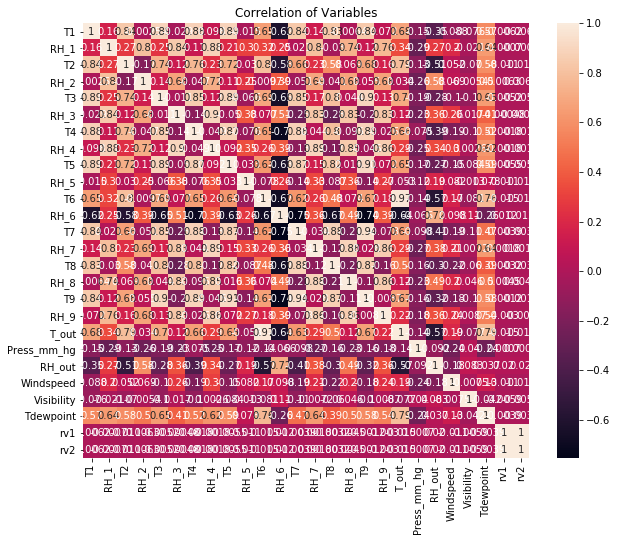

Variance Inflation Factors (VIF)
> 10: An indication that multicollinearity may be present
> 100: Certain multicollinearity among the variables
-------------------------------------
T1: 3603.955626656371
RH_1: 1638.9355660044603
T2: 2490.0234734413757
RH_2: 2163.8490995166685
T3: 1239.1915891748972
RH_3: 1567.8105595694215
T4: 932.7690257080151
RH_4: 1357.8056228179785
T5: 1187.5709879306376
RH_5: 45.08389197086802
T6: 88.92267272478941
RH_6: 40.32019973531826
T7: 1613.3975458723044
RH_7: 518.8418529869083
T8: 975.0487017094916
RH_8: 568.3987252898221
T9: 2517.024161536373
RH_9: 637.3645938889575
T_out: 399.7137760260668
Press_mm_hg: 2084.6511787182817
RH_out: 1297.946140926783
Windspeed: 5.2457587103624155
Visibility: 12.029581257827656
Tdewpoint: 132.47778252383245
rv1: inf
rv2: inf

25 cases of possible multicollinearity
21 cases of definite multicollinearity

Assumption not satisfied

Coefficient interpretability will be problematic
Consider removing variables with a high Variance 

C:\Users\abiso\Anaconda\lib\site-packages\statsmodels\stats\outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [24]:
multicollinearity_assumption(energy_model, dat1, target1, feature_names=None)

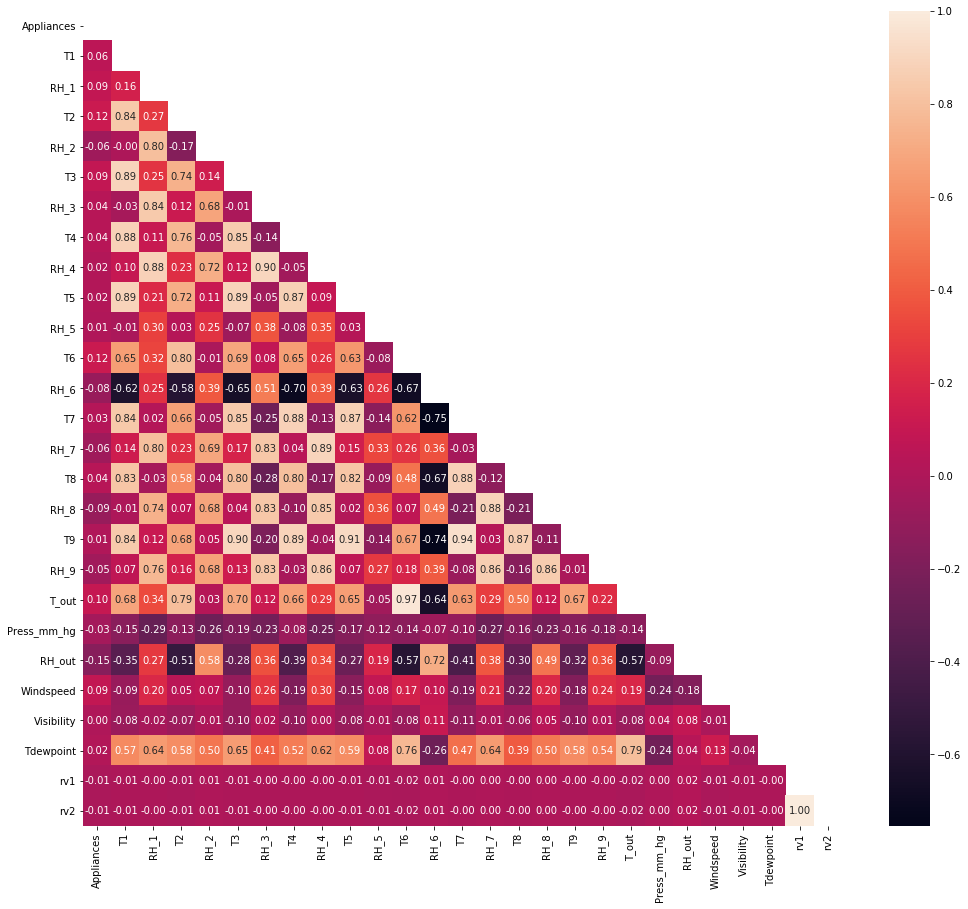

In [25]:
 #Use the weather , temperature , applainces and random column to see the correlation

corr = dat.corr()

# Mask the repeated values
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
  
fig = plt.figure(figsize=(17, 15))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, annot=True, fmt=".2f" , mask=mask);

In [26]:
# lets see how each features correlates with the target column
cor_matrix = dat.corr()
cor_matrix['Appliances']

Appliances     1.000000
T1             0.055447
RH_1           0.086031
T2             0.120073
RH_2          -0.060465
T3             0.085060
RH_3           0.036292
T4             0.040281
RH_4           0.016965
T5             0.019760
RH_5           0.006955
T6             0.117638
RH_6          -0.083178
T7             0.025801
RH_7          -0.055642
T8             0.039572
RH_8          -0.094039
T9             0.010010
RH_9          -0.051462
T_out          0.099155
Press_mm_hg   -0.034885
RH_out        -0.152282
Windspeed      0.087122
Visibility     0.000230
Tdewpoint      0.015353
rv1           -0.011145
rv2           -0.011145
Name: Appliances, dtype: float64

## Obsevration - VIF and Correlation Plot Indicates that there is a high multicollinearity amongst the variables. 
Temperature - All the temperature variables from T1-T9 and T_out have positive correlation with the target Appliances.
Four columns have a high degree of correlation with T9 (T3,T5,T7,T8). Also T6 & T_Out has high correlation (both temperatures from outside) . Hence T6 & T9 can be removed from training set as information provided by them can be provided by other fields.
Weather attributes - Visibility, Tdewpoint, Press_mm_hg have low correlation values
Humidity - There are no significantly high correlation cases (> 0.9) for humidity sensors.


In [27]:
data1 = dat1.drop(['T9', 'T6', 'rv1', 'rv2'], axis=1, inplace=True)

## DATA SPLITTING

##  Function 
- LOG TRANS
- TRAIN_TEST_SPLIT
- PLOT PREDICTION AND ACTUAL, DISTRIBUTION OF THE RESIDUAL, PLOT RESIDUAL 
- CHECK MODEL PERFORMANCE, SUMMARY 
- USE DATAFRAME TO OUTPUT

OBJECTIVES
- DO NORMAL REGRESSION WITH NORMAL DATA
- DO LOG TRANSFORM
- DO AVERAGE TEMP & AVG RH 
- DO REMOVAL OF VARIABLES

ALSO 
- USE ORDER MODELS COMPARE ACCURACY OF MODELS 

In [48]:
# Let's use the handy function we created
def adj_r2(X,Y,model):
    r2 = model.score(X,Y)
    n = X.shape[0]
    k = X.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-k-1)
    return adjusted_r2

In [64]:
def split_logtrans(data, log_tran=False, splitratio=0.3, randomState=42):
    
    
    from sklearn.preprocessing import MinMaxScaler
    
    dat1 = data.copy()
   
    if log_tran == False:
            
        scaler = MinMaxScaler()

        # normalizing the features
        normalized_features = pd.DataFrame(scaler.fit_transform(dat1), columns=dat1.columns)

        # splitting data into features(independent) and target(dependent) variables

        # predictors
        features = normalized_features.drop(['Appliances'], axis=1)

        # target variable
        targets = normalized_features['Appliances']
        
    else:
        log_app = np.log(dat1['Appliances'])
        # Then we add it to our data frame
        dat1['Appliances'] = log_app

        targets = dat1['Appliances']
        # The inputs are everything BUT the dependent variable, so we can simply drop it
        inputs = dat1.drop(['Appliances'],axis=1)

        # Create a scaler object
        scaler = MinMaxScaler()
        # Fit the inputs (calculate the mean and standard deviation feature-wise)
        scaler.fit(inputs)
        # Scale the features and store them in a new variable (the actual scaling procedure)
        features = scaler.transform(inputs)
        
    # Import the module for the split
    from sklearn.model_selection import train_test_split

    # Split the variables with an 80-20 split and some random state
    # To have the same split as mine, use random_state = 365
    x_train, x_test, y_train, y_test = train_test_split(features, targets, test_size=splitratio, random_state=randomState)
    
    return x_train, x_test, y_train, y_test

In [69]:
def mult_reg(data,log_t=False):
    """
    Description: This function will generates a Linear Regression using the data available with a transformation of the 
                 target variable. 
                 It also produces a distribution and regression plot of the residuals of the model with the accuracy of the models.
    
    
    """
    
    x_train, x_test, y_train, y_test = split_logtrans(data, log_tran=log_t, splitratio=0.3, randomState=42)
    
    # Create a linear regression object
    reg = LinearRegression()
    # Fit the regression with the scaled TRAIN inputs and targets
    reg.fit(x_train,y_train)
    
    # Let's check the outputs of the regression
    # I'll store them in y_hat as this is the 'theoretical' name of the predictions
    y_hat = reg.predict(x_train)
    
    
   
   
    # Note that this is NOT the adjusted R-squared
    # in other words... find the Adjusted R-squared to have the appropriate measure :)
    # Create a regression summary where we can compare them with one-another
    reg_summary = pd.DataFrame(data.drop(['Appliances'], axis=1).columns.values, columns=['Features'])
    reg_summary['Weights'] = reg.coef_
    print(reg_summary)
    
    # Once we have trained and fine-tuned our model, we can proceed to testing it
    # Testing is done on a dataset that the algorithm has never seen
    # Luckily we have prepared such a dataset
    # Our test inputs are 'x_test', while the outputs: 'y_test' 
    # We SHOULD NOT TRAIN THE MODEL ON THEM, we just feed them and find the predictions
    # If the predictions are far off, we will know that our model overfitted
    y_hat_test = reg.predict(x_test)
    # Create a scatter plot with the test targets and the test predictions
    # You can include the argument 'alpha' which will introduce opacity to the graph
    
    # Calculating residuals for the plot
    df_results = calculate_residuals(reg, x_test,y_test)
    # Plotting the actual vs predicted values
    if log_t==False:
        print("                           "+"Multiple Linear Regression"+"                    ")
        print("                           "+"---------------------------"+"                    ")
    else: 
        print("Multiple Linear Regression with a Log Transformation of the Target Variable ")
        print("----------------------------------------------------------------------------")
        
    sns.lmplot(x='Actual', y='Predicted', data=df_results, fit_reg=False, size=7)
        
    # Plotting the diagonal line
    line_coords = np.arange(df_results.min().min(), df_results.max().max())
    plt.plot(line_coords, line_coords,  # X and y points
             color='darkorange', linestyle='--')
    plt.title('Actual vs. Predicted')
    plt.show()
    
    
    # Zooming  into the Graph - to get a clearer view of the predicted values
    plt.scatter(y_test, y_hat_test, alpha=0.2)
    plt.xlabel('Actual',size=18)
    plt.ylabel('Predictions',size=18)
    plt.show()
    # In the best case scenario this plot should be normally distributed
    
    # Plotting the residuals distribution
    plt.subplots(figsize=(12, 6))
    plt.title('Distribution of Residuals')
    sns.distplot(df_results['Residuals'])
    plt.show()
    

    # Find the R-squared of the model
    print("The Model Accuracy Metrics")
    print("---------------------------")
    print('Train R-Squared: {} '.format(reg.score(x_train,y_train)))
    print('Test R-Squared: {} '.format(reg.score(x_test,y_test)))
          
    print("The Train Adjusted R-Squared is {}".format(adj_r2(x_train,y_train,reg)))
    print("The Test Adjusted R-Squared is {}".format(adj_r2(x_test,y_test,reg)))
    
    
    from sklearn.metrics import mean_absolute_error
    mae = mean_absolute_error(y_test, y_hat_test)
    print("Mean Absolute Error: {}".format(mae))

    from sklearn.metrics import  mean_squared_error
    rmse = np.sqrt(mean_squared_error((y_test), (y_hat_test)))
    mse = mean_squared_error((y_test), (y_hat_test))
    print("Root Mean Squared Error: {}".format(rmse))
    print("Mean Squared Error: {}".format(mse))
    
    

       Features   Weights
0            T1  0.046828
1          RH_1  0.901779
2            T2 -0.346860
3          RH_2 -0.686529
4            T3  0.395396
5          RH_3  0.119055
6            T4  0.075057
7          RH_4  0.068032
8            T5  0.009055
9          RH_5  0.053125
10           T6  0.417631
11         RH_6  0.068146
12           T7 -0.065835
13         RH_7 -0.048419
14           T8  0.275212
15         RH_8 -0.344905
16           T9 -0.338527
17         RH_9 -0.092635
18        T_out -0.530120
19  Press_mm_hg -0.002740
20       RH_out -0.125382
21    Windspeed  0.053019
22   Visibility  0.017033
23    Tdewpoint  0.205065
24          rv1  0.000980
25          rv2  0.000980
                           Multiple Linear Regression                    
                           ---------------------------                    


C:\Users\abiso\Anaconda\lib\site-packages\seaborn\regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


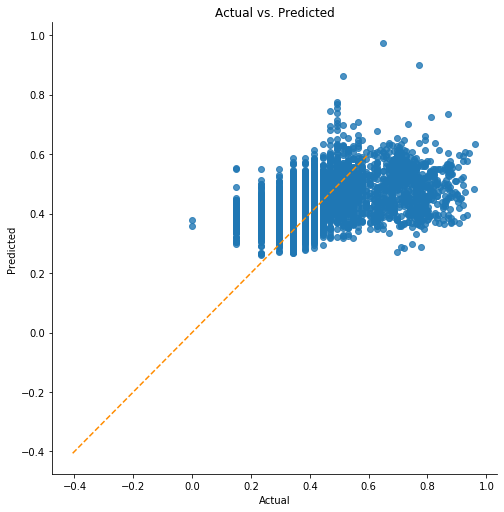

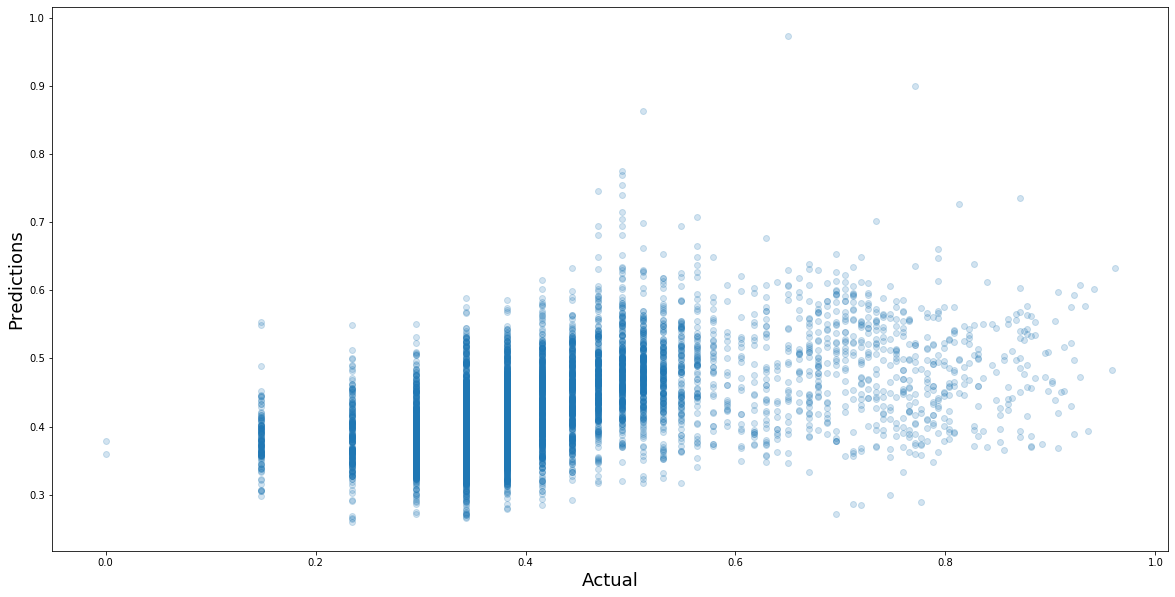

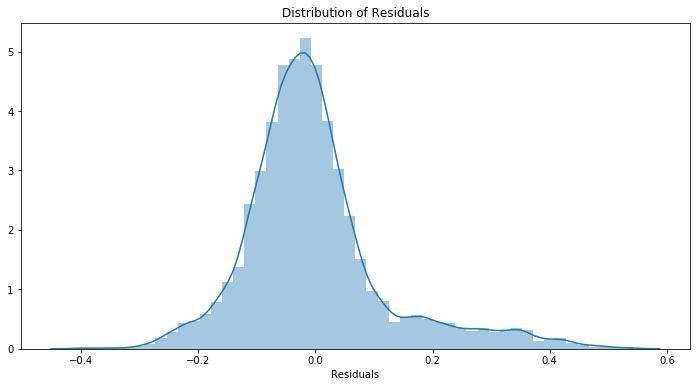

The Model Accuracy Metrics
---------------------------
Train R-Squared: 0.24031242383876428 
Test R-Squared: 0.25041674427816796 
The Train Adjusted R-Squared is 0.23887977881227618
The Test Adjusted R-Squared is 0.2471101333774608
Mean Absolute Error: 0.08609608859258966
Root Mean Squared Error: 0.12217681393113981
Mean Squared Error: 0.014927173862364359


In [70]:
mult_reg(dat,log_t=False)

       Features   Weights
0            T1  0.057919
1          RH_1  0.908481
2            T2 -0.339693
3          RH_2 -0.679821
4            T3  0.381745
5          RH_3  0.106275
6            T4  0.087221
7          RH_4  0.074658
8            T5  0.018045
9          RH_5  0.059067
10           T6  0.429937
11         RH_6  0.070434
12           T7 -0.086478
13         RH_7 -0.043452
14           T8  0.307100
15         RH_8 -0.370388
16           T9 -0.351295
17         RH_9 -0.094585
18        T_out -0.547828
19  Press_mm_hg -0.007492
20       RH_out -0.129730
21    Windspeed  0.055056
22   Visibility  0.016936
23    Tdewpoint  0.217197
24          rv1  0.000959
25          rv2  0.000959
Multiple Linear Regression with a Log Transformation of the Target Variable 
----------------------------------------------------------------------------


C:\Users\abiso\Anaconda\lib\site-packages\seaborn\regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


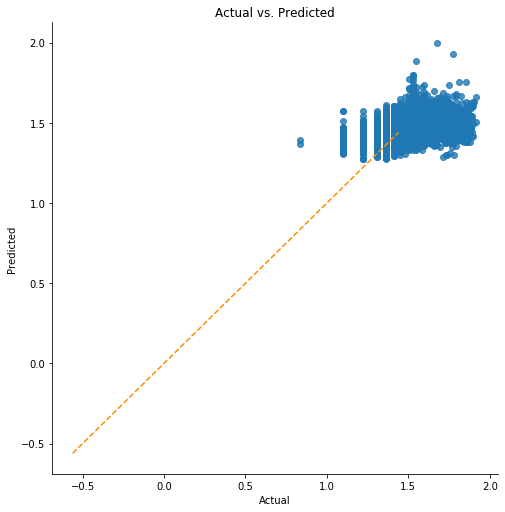

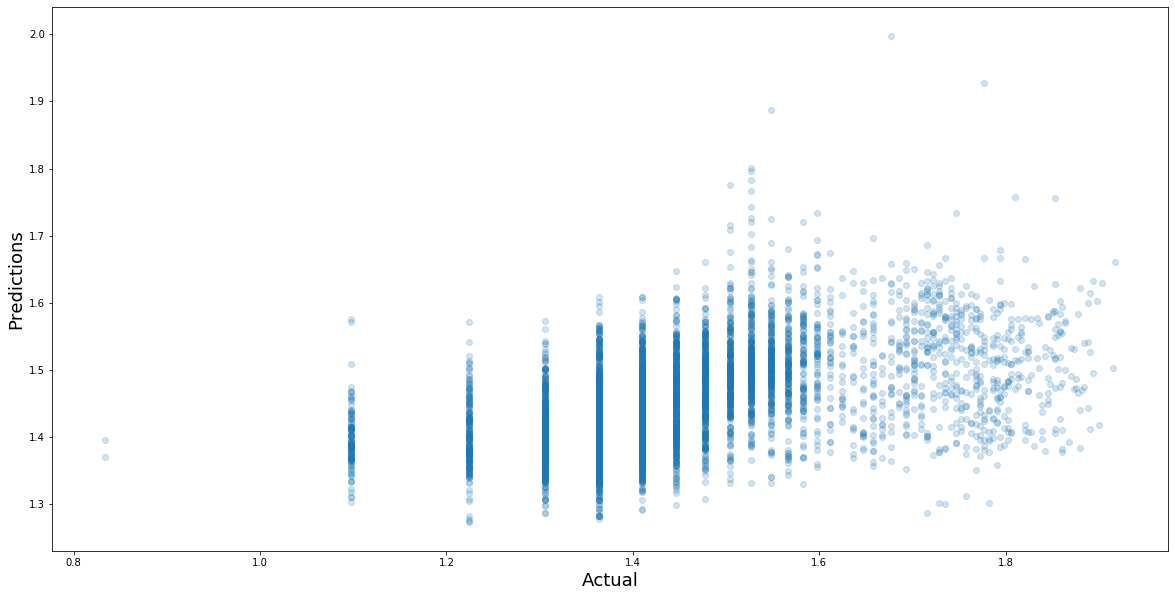

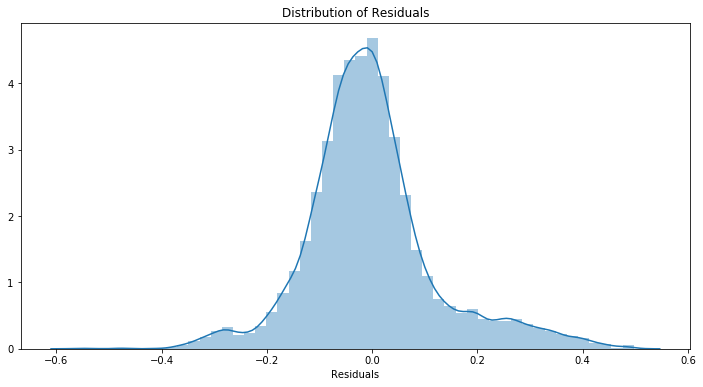

The Model Accuracy Metrics
---------------------------
Train R-Squared: 0.25251061003037834 
Test R-Squared: 0.26240172391265093 
The Train Adjusted R-Squared is 0.2511009687640252
The Test Adjusted R-Squared is 0.25914798194144784
Mean Absolute Error: 0.08963293436700918
Root Mean Squared Error: 0.1252795078826683
Mean Squared Error: 0.01569495509532355


In [71]:
mult_reg(dat,log_t=True)

In [44]:
# importing the required algorithms
from sklearn.linear_model import Ridge, Lasso, LinearRegression, ElasticNet
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

# import the evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# create a dictionary of different algorithms 
models = {'Ridge': Ridge(),
        'Lasso': Lasso(),
        'ElasticNet':ElasticNet(),
        'LinearRegression':LinearRegression(),
        'KNeighborsRegressor':KNeighborsRegressor(),
        'RandomForestRegressor':RandomForestRegressor(),
        'ExtraTreesRegressor':ExtraTreesRegressor(),
        'GradientBoostingRegressor':GradientBoostingRegressor(),
        'DecisionTreeRegressor':DecisionTreeRegressor()}

In [84]:
# helper funtion to compute the score, RMSE, time on the training and testing set

def pipeline(data, log_t = False):
    """
    This function iteratively goes through all the models defined in the dictionary and 
    computes the Train_score, Test_score, MSE, MAE and RMSE.
    
    Parameters: model, training set(X_train), test_set(X_test), train_labels(y_train), and test_labels(y_test).
    
    Returns: This funtion returns a dataFrame containing calculations of each models and also plots bar
            chart showing how each models performs.
    """
    # create a dictionary of different algorithms 
    models = {'Ridge': Ridge(),
        'Lasso': Lasso(),
        'ElasticNet':ElasticNet(),
        'LinearRegression':LinearRegression(),
        'KNeighborsRegressor':KNeighborsRegressor(),
        'RandomForestRegressor':RandomForestRegressor(),
        'ExtraTreesRegressor':ExtraTreesRegressor(),
        'GradientBoostingRegressor':GradientBoostingRegressor(),
        'DecisionTreeRegressor':DecisionTreeRegressor()}
     
    X_train, X_test, y_train, y_test = split_logtrans(data, log_tran=log_t, splitratio=0.3, randomState=42)
    
    # store properties of each model
    prop = []
    
    # loop through the dictionary of models
    for reg_name, regressor in models.items():
        # empty dict for storing properties of each models
        reg_dict = {}
        # store the name of each model
        reg_dict['Name'] = reg_name
        # fit the regressor model
        regressor.fit(X_train, y_train)
        # compute the Train_score
        reg_dict['Train_score'] = regressor.score(X_train, y_train)
        # compute the test scores
        reg_dict['Test_score'] = regressor.score(X_test, y_test)
        # Compute Adjusted R-Squared for Train
        reg_dict['Adj-R-Sqd'] = adj_r2(X_test,y_test,regressor)
        # compute the mean_absolute_error
        reg_dict['MAE'] = mean_absolute_error(y_test, regressor.predict(X_test))
        #compute the mean_squared_error
        reg_dict['MSE'] = mean_squared_error(y_test, regressor.predict(X_test))
        # compute the RMSE
        reg_dict['RMSE'] = np.sqrt(mean_squared_error(y_test, regressor.predict(X_test)))
        # append the properties of a single regressor to the prop list
        prop.append(reg_dict)
        #plotting the distribution of the actual and predicted data
        #print("      Model:{}        ".format(reg_name))
        #sns.distplot(y_test, hist = False, color = 'r', label = 'actual')
        #y_pred = regressor.predict(X_test)
        #sns.distplot(y_pred, hist = False, color = 'b', label = 'prediction')
     
    # create a dataframe with a list of all the model properties
    summary_df = pd.DataFrame(prop)
    
    # plot a bar chart to visualize the performance of each model
    summary_df.plot(x='Name', y=['Train_score', 'Test_score','Adj-R-Sqd', 'MAE', 'MSE', 'RMSE'], kind='bar', figsize=(15,10),
               title='Performance scores of different models')
    
        
    return summary_df

,Name,Train_score,Test_score,Adj-R-Sqd,MAE,MSE,RMSE
0,Ridge,0.239146,0.249114,0.245802,0.086059,0.014953,0.122283
1,Lasso,0.000000,-0.000007,-0.004419,0.105884,0.019914,0.141117
2,ElasticNet,0.000000,-0.000007,-0.004419,0.105884,0.019914,0.141117
3,LinearRegression,0.240312,0.250417,0.247110,0.086096,0.014927,0.122177
4,KNeighborsRegressor,0.649800,0.445325,0.442878,0.070538,0.011046,0.105099
5,RandomForestRegressor,0.956678,0.692933,0.691578,0.051273,0.006115,0.078198
6,ExtraTreesRegressor,1.000000,0.733661,0.732486,0.048137,0.005304,0.072828
7,GradientBoostingRegressor,0.413997,0.360111,0.357288,0.078096,0.012743,0.112884
8,DecisionTreeRegressor,1.000000,0.431526,0.429018,0.065420,0.011321,0.106398


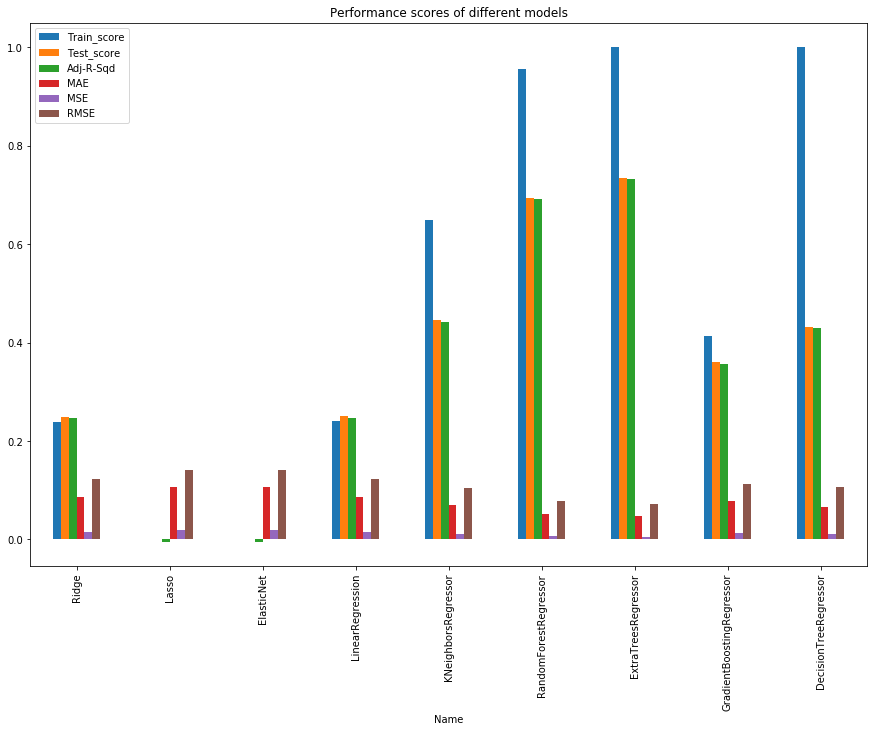

In [85]:
# execute the function
pipeline(dat, log_t=False)

Observation  

- The most performing models (Top 2) are the ExtraTreeRegressor and DecisionTreeRegressor with Adjusted R-Squared of 0.732 and 0.429
- Linear Model didn't perform well Adj. R-Sqd = 0.247, therefore I will be making an assumption with respect to the plot of the residuals, that there relationship between the target and explanatory variables is not fully linear but could be capture using a more robust regression model.  
- I will therefore take a step further to analyze the 2 top models by Tuning the Hyperparameter to get optimized the two models using Randomized 

In [102]:
def hyperParamTuning(data): 
    print()
    print(format('How to find parameters using GridSearchCV  for Regression','*^82'))    
    
    import warnings
    warnings.filterwarnings("ignore")
    
    # load libraries
    # Randomized for Algorithm Tuning
    from scipy.stats import uniform
    from sklearn.model_selection import KFold
    #from sklearn import datasets
    from sklearn.model_selection import train_test_split
    from sklearn.model_selection import GridSearchCV
    from sklearn.model_selection import  RandomizedSearchCV
    
    model_df = {'Name':['ExtraTreeRegressor' ], 'Model' :[ExtraTreesRegressor(random_state=42)]}

    model_df = pd.DataFrame(model_df)
    
    # load dataset
    X_train, X_test, y_train, y_test = split_logtrans(data, log_tran=False, splitratio=0.3, randomState=42)
    
    for m in range(0,model_df.shape[0]):
    
                # define the param grid
                
                param_grid = [{
                              'max_depth': [80, 150, 200,250],
                              'n_estimators' : [10, 50, 100, 200, 250],
                              'max_features': ["auto", "sqrt", "log2"]
                            }]
                #param_grid = {'alpha': uniform()}
                seed=6
                kfold = KFold(n_splits=8, random_state=seed, shuffle=True)


                # Instantiate the grid search model
                rand_search = RandomizedSearchCV(model_df['Model'][m], param_grid,cv=kfold, n_jobs = -1 , scoring='r2' , random_state=seed)
                # fit the gridserch model
                rand_search.fit(X_train, y_train)
                
                #adj_r2(X_test,y_test,rand_search)
                # check for the best param fot the ExtraTreeReggressor
                name = model_df['Name'][m]
                print(f'Model: {name}')
                print("------------------------------")
                 
                best_model = rand_search.best_estimator_
                print(f'best param of the ExtraTreeRegressor is: {rand_search.best_params_}')
                print(f'R2_score on training_set with tuned parameters: {best_model.score(X_train, y_train)}')
                print(f'R2_score on testing_set with tuned parameters: {round(best_model.score(X_test, y_test), 3)}')
                print(f'best param of the ExtraTreeRegressor is: {adj_r2(X_test,y_test,rand_search)}')
                print(f'MSE_score on testing_set with tuned parameters: {round(mean_squared_error(y_test, best_model.predict(X_test)), 3)}')
                print(f'RMSE_score on testing_set with tuned parameters: {round(np.sqrt(mean_squared_error(y_test, best_model.predict(X_test))), 3)}')

    
hyperParamTuning(dat)


************How to find parameters using GridSearchCV  for Regression*************
Model: ExtraTreeRegressor
------------------------------
best param of the ExtraTreeRegressor is: {'n_estimators': 250, 'max_features': 'sqrt', 'max_depth': 150}
best param of the ExtraTreeRegressor is: {'n_estimators': 250, 'max_features': 'sqrt', 'max_depth': 150}
R2_score on training_set with tuned parameters: 1.0
R2_score on testing_set with tuned parameters: 0.736
best param of the ExtraTreeRegressor is: 0.7352765095765554
MSE_score on testing_set with tuned parameters: 0.006
RMSE_score on testing_set with tuned parameters: 0.075
